# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

## Ali Darabi - 810100264

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 7:](#2-1)
    - [َQuestion 8:](#2-2)
    - [َQuestion 9:](#2-3)
    - [َQuestion 10:](#2-4)

In [1]:
# import
import numpy as np
import gym
import matplotlib.pyplot as plt
import random

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="human")

In [3]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
env.render()

you can see the environment in each step by render command :


In [4]:
# Total no. of states
env.observation_space.n

16

In [5]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

Value Iteration algorithm is a method we use to find the optimal value function and policy for a MDP or Markov Decision Process. We gradually improve the value function for each state until it converges to optimal value function. We applying the Bellman equation iteratively until value function’s changes become very small or it does not change anymore (converge to optimal solution).

<a name='1-1'></a>
### Question 2:

In [6]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))

    def value_estimation(self):
        self.delta = np.inf

        while(self.delta > self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                        action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break




    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

Policy Iteration algorithm is a method we use to find the optimal policy for a MDP or Markov Decision Process. It’s often faster than Value Iteration algorithm and it often converges faster. At first we define a initial policy and it can be arbitrary.Next we evaluate the current policy with policy evaluation, Once we evaluated the current policy, we use policy improvement to generate a better policy.We repeat this untill it converges to optimal policy.

<a name='1-2'></a>
### Question 4:

In [7]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False
        

    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):
            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

        

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In [8]:
value_iteration_algorithm = ValueIteration(env, 0.9)
value_iteration_algorithm.reset()
value_iteration_algorithm.value_estimation()
#Print Optimal Policy :
v_optimal_policy = []
for i in range(0, 16):
    direct = value_iteration_algorithm.get_optimal_policy(i)
    if direct == 0:
        arrow = "\u2190"
    elif direct == 1:
        arrow = "\u2193"
    elif direct == 2:
        arrow = "\u2192"
    else:
        arrow = "\u2191"
    v_optimal_policy.append(arrow)
v_optimal_policy[15] = "*"
print("Optimal Policy :\n")
print("----------------")
for i in range(0, 16, 4):
    print("|",v_optimal_policy[i],"|",v_optimal_policy[i+1],"|",v_optimal_policy[i+2],"|",v_optimal_policy[i+3],"|")
    print("----------------")
#Print State Values :
v_states_values = value_iteration_algorithm.get_state_values()
v_states_values = [f"{val:.4f}" for val in v_states_values]
print()
print("States Value :\n")
print("--------------------")
for i in range(0, 16, 4):
    print("|",v_states_values[i],"|",v_states_values[i+1],"|",v_states_values[i+2],"|",v_states_values[i+3],"|")
    print("--------------------")
#Print Q_values
print()
v_q_values = value_iteration_algorithm.get_q_values()
print(v_q_values)
#Show Optimal Path
rep_times = 3 #Number of repetitions.
for i in range(0, rep_times):
    env.reset()
    value_iteration_algorithm.reset()
    value_iteration_algorithm.value_estimation()
    result = value_iteration_algorithm.take_action(value_iteration_algorithm.get_optimal_policy(0))
    next_state = result[0]
    reach_final = False
    while(not reach_final):
        result = value_iteration_algorithm.take_action(value_iteration_algorithm.get_optimal_policy(next_state))
        next_state = result[0]
        if (result[2] == True):
            reach_final = True


Optimal Policy :

----------------
| ↓ | → | ↓ | ← |
----------------
| ↓ | ← | ↓ | ← |
----------------
| → | ↓ | ↓ | ← |
----------------
| ← | → | → | * |
----------------

States Value :

--------------------
| 0.5905 | 0.6561 | 0.7290 | 0.6561 |
--------------------
| 0.6561 | 0.1329 | 0.8100 | 0.1329 |
--------------------
| 0.7290 | 0.8100 | 0.9000 | 0.1329 |
--------------------
| 0.1329 | 0.9000 | 1.0000 | 0.0000 |
--------------------

[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.13286025 0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.13286025 0.59049    0.59049   ]
 [0.59049    0.6561     0.13286025 0.531441  ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957423 0.81       0.13286025 0.6561    ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.6561     0.13286025 0.729      0.59049   ]
 [0.6561     0.81       0.81       0.11957423]
 [0.729      0.9        0.13286025 0.729     ]
 [0.13286025 0.13286025 0.1328602

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


<a name='1-3-2'></a>
#### Policy Iteration:

In [9]:
policy_iteration_algorithm = PolicyIteration(env, 0.9)
policy_iteration_algorithm.reset()
policy_iteration_algorithm.policy_estimation()
#Print Optimal Policy :
optimal_policy = []
for i in range(0, 16):
    direct = policy_iteration_algorithm.get_optimal_policy(i)
    if direct == 0:
        arrow = "\u2190"
    elif direct == 1:
        arrow = "\u2193"
    elif direct == 2:
        arrow = "\u2192"
    else:
        arrow = "\u2191"
    optimal_policy.append(arrow)
optimal_policy[15] = "*"
print("Optimal Policy :\n")
print("----------------")
for i in range(0, 16, 4):
    print("|",optimal_policy[i],"|",optimal_policy[i+1],"|",optimal_policy[i+2],"|",optimal_policy[i+3],"|")
    print("----------------")
#Print State Values :
states_values = policy_iteration_algorithm.get_state_values()
states_values = [f"{val:.4f}" for val in states_values]
print()
print("States Value :\n")
print("--------------------")
for i in range(0, 16, 4):
    print("|",states_values[i],"|",states_values[i+1],"|",states_values[i+2],"|",states_values[i+3],"|")
    print("--------------------")
#Print Q_values
print()
q_values = policy_iteration_algorithm.get_q_values()
print(q_values)
#Show Optimal Path
rep_times = 3 #Number of repetitions.
for i in range(0, rep_times):
    env.reset()
    policy_iteration_algorithm.reset()
    policy_iteration_algorithm.policy_estimation()
    result = policy_iteration_algorithm.take_action(policy_iteration_algorithm.get_optimal_policy(0))
    next_state = result[0]
    reach_final = False
    while(not reach_final):
        result = policy_iteration_algorithm.take_action(policy_iteration_algorithm.get_optimal_policy(next_state))
        next_state = result[0]
        if (result[2] == True):
            reach_final = True


Optimal Policy :

----------------
| ↓ | → | ↓ | ← |
----------------
| ↓ | ← | ↓ | ← |
----------------
| → | ↓ | ↓ | ← |
----------------
| ← | → | → | * |
----------------

States Value :

--------------------
| 0.5905 | 0.6561 | 0.7290 | 0.6561 |
--------------------
| 0.6561 | 0.0000 | 0.8100 | 0.0000 |
--------------------
| 0.7290 | 0.8100 | 0.9000 | 0.0000 |
--------------------
| 0.0000 | 0.9000 | 1.0000 | 0.0000 |
--------------------

[[5.31441000e-01 5.90490000e-01 5.90490000e-01 5.31441000e-01]
 [5.31441000e-01 2.77205245e-08 6.56100000e-01 5.90490000e-01]
 [5.90490000e-01 7.29000000e-01 5.90490000e-01 6.56100000e-01]
 [6.56100000e-01 2.77205245e-08 5.90490000e-01 5.90490000e-01]
 [5.90490000e-01 6.56100000e-01 2.77205245e-08 5.31441000e-01]
 [2.77205245e-08 2.77205245e-08 2.77205245e-08 2.77205245e-08]
 [2.77205245e-08 8.10000000e-01 2.77205245e-08 6.56100000e-01]
 [2.77205245e-08 2.77205245e-08 2.77205245e-08 2.77205245e-08]
 [6.56100000e-01 2.77205245e-08 7.29000000e-01

<a name='1-4'></a>
### Question 6:

In [10]:
import time
#The number of repetition
N = 200

<a name='1-4-1'></a>
#### Value Iteration:

In [11]:
vi = ValueIteration(env, 0.9)
start_time = time.time()
for i in range(0, N):
    vi.reset()
    vi.value_estimation()
end_time = time.time()
vi_time = end_time - start_time
print(vi_time / N)

0.25050678849220276


<a name='1-4-2'></a>
#### Policy Iteration:

In [12]:
pi = PolicyIteration(env, 0.9)
start_time = time.time()
for i in range(0, N):
    pi.reset()
    pi.policy_estimation()
end_time = time.time()
pi_time = end_time - start_time
print(pi_time / N)

0.25050358653068544


#### Compare:
Optimal policy : Both Value Iteration (VI) and Policy Iteration (PI) algorithms converge to the same optimal policy for a given Markov Decision Process (MDP).
#
State values and State-action values : The state values table for Value Iteration (VI) and Policy Iteration (PI) algorithms is not the same, we have 0 for holes in frozen lake map for PI but we have 0.1329 for them in VI. This is because the algorithms calculate the state values in different ways. It's the same for state-action values and PI and VI state-action values are not the same because their state values are different. In general, Value Iteration often converges to the optimal state values more quickly than Policy Iteration. However, Policy Iteration can be more efficient than Value Iteration for large MDPs, as it does not require the entire state value table to be stored in memory.
#
Converge Speed : In general Value Iteration often converges faster than Policy Iteration, especially in scenarios with a large number of states. Policy Iteration has separate evaluation and improvement steps, so it may take more iterations to converge in large number states cases. However, Policy Iteration might be faster when it's easier or less computationally expensive to update the policy compared to updating the values of states.
#
As you can see, It appears that after N = 200 repetitions, Policy Iteration is slightly faster, this may not always be the case. The results might change for larger values of N.

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [13]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPISODE_DECREASE_RATE_EPSILON = 0.1
EPSILON = 0.1
EPISODE_DECREASE_RATE_LEARNING_RATE = 0.0015
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 264

In [14]:
# environment
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset(seed=STUDENT_NUM)
Initial_State = env.reset()

In [15]:
# Total no. of states
env.observation_space.n

500

In [16]:
# Total no. of actions
env.action_space.n

6

<a name='2-1'></a>
### Question 7:

Q-learning is a reinforcement learning (RL) algorithm that help us to determine the best action for an agent within a given environment. Q-learning os a model-free algorithm ,meaning that it does not require a model of the environment to learn. Q-learning is off-policy, meaning that it can learn the optimal policy independent of the policy being followed.At first we initialize the Q-table, then we observe the current state (S), next we select an action a from S using an exploration policy, next we take action a and observe the new state S' and receive reward r and finaly we update the Q-value of the state-action pair (S, a) using the Bellman equation then repeat this process untill it converges to optimal solution.

<a name='2-2'></a>
### Question 8:

In [17]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed

    def choose_action(self, state):
      ### START CODE HERE ###
      # With probability epsilon, choose a random action
      random_prob = random.random()
      if (random_prob <= self.epsilon):
        action = random.randint(0, 5)
      # Otherwise, choose the action with the highest Q-value
      else:
        max_action = max(self.q_table[state])
        for i in range(len(self.q_table[state])):
          if self.q_table[state][i] == max_action:
            action = i
            break
      ### END CODE HERE ###
      return action

    def update_q_table(self, state, action, nextState, reward):
      ### START CODE HERE ###
      # Calculate the new Q-value using the Q-learning formula
      max_next_state = max(self.q_table[nextState])
      self.q_table[state][action] = self.q_table[state][action] + self.learning_rate * (reward + (self.discount_factor * max_next_state) - self.q_table[state][action])
      ### END CODE HERE ###

    def decay_epsilon(self, episode):
      ### START CODE HERE ###
      self.epsilon = self.epsilon / (1 + (EPISODE_DECREASE_RATE_EPSILON * episode))
      ### END CODE HERE ###

    def decrease_learning_rate(self, episode):
      ### START CODE HERE ###
      self.learning_rate = self.learning_rate - (EPISODE_DECREASE_RATE_LEARNING_RATE / (episode + 1))
      ### END CODE HERE ###

    def take_action(self, action):
      next_state, reward, done, _, _ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)

<a name='2-3'></a>
### Question 9:

#### Epsilon Decay:
At the beginning, we want our agent to explore different actions and learn about the environment.So, we start with a high epsilon value, which allows the agent to take random actions more often. As the agent learns, we slowly decrease the epsilon value to encourage it to choose the best actions more often.So we use an exponential decay method to decrease epsilon. This means that the decrease in epsilon gets smaller as the number of episodes increases. This ensures that the agent has enough time to explore early on but also focuses on exploitation (choosing the best actions) towards the end of training.Here's the formula we use to calculate the new epsilon value after each episode:
##### epsilon = epsilon / (1 + (EPISODE_DECREASE_RATE_EPSILON * episode))
EPISODE_DECREASE_RATE_EPSILON is a constant value that controls how fast epsilon decreases. A higher value will cause epsilon to decrease faster, while a lower value will cause it to decrease slower.

#### Learning Rate Decay:
The learning rate plays a crucial role in our problem, determining how quickly the agent updates its understanding of the environment.Initially, we want our agent to learn about the environment and explore different actions.Therefore, we start with a relatively high learning rate, allowing the agent to make updates based on its experiences.
As the agent learns and gains knowledge of the environment, we gradually decrease the learning rate. This ensures that the agent doesn't make drastic changes to its Q-values based on new information and instead focuses on refining its understanding of the optimal actions.So we use the following formula to adjust the learning rate after each episode:
##### learning_rate = learning_rate - (EPISODE_DECREASE_RATE_LEARNING_RATE / (episode + 1))
EPISODE_DECREASE_RATE_LEARNING_RATE controls the rate at which the learning rate decreases.By gradually decreasing the learning rate over time, we ensure that the agent has sufficient time to explore early on and then refines its knowledge as it converges towards the optimal policy.

<a name='2-3-1'></a>
#### Implementation with constant learning rate:

In [18]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset(seed=STUDENT_NUM)
Initial_State = env.reset()

optimal_policy = [0] * 500
reward_episode = [0] * EPISODES
best_agent_reward = 0
for rep in range(REPS):
    agent = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)   
    agent.reset()
    pervious_final_ep = reward_episode[EPISODES-1]
    for episode in range(EPISODES):
        Initial_state = env.reset()
        done = False
        state = Initial_State[0]
        action = agent.choose_action(state)
        result = agent.take_action(action)
        next_state = result[0]
        reward = result[1]
        reward_episode[episode] += reward
        agent.update_q_table(state, action, next_state, reward)
        while True:
            state = next_state
            action = agent.choose_action(state)
            result = agent.take_action(action)
            next_state = result[0]
            reward = result[1]
            reward_episode[episode] += reward
            agent.update_q_table(state, action, next_state, reward)
            done = result[2]
            if done:
                break
        agent.decay_epsilon(episode)
    final_rep_reward_each_rep = reward_episode[EPISODES-1] - pervious_final_ep
    if (rep == 0):
        best_agent_reward = reward_episode[EPISODES-1]
        for i in range(0, 500):
            optimal_policy[i] = agent.get_optimal_policy(i)
    else:
        if (final_rep_reward_each_rep > best_agent_reward):
            best_agent_reward = final_rep_reward_each_rep
            for i in range(0, 500):
                optimal_policy[i] = agent.get_optimal_policy(i)

reward_episode = [rew / REPS for rew in reward_episode]
print("Best Agent Final Reward (const LR) :", best_agent_reward)
print("Mean Agent Final Reward (const LR) :", reward_episode[EPISODES-1])

Best Agent Final Reward (const LR) : 12
Mean Agent Final Reward (const LR) : 5.65


<a name='2-3-2'></a>
#### Implementation with reduced learning rate:

In [19]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset(seed=STUDENT_NUM)
Initial_State = env.reset()

optimal_policy_rlr = [0] * 500
reward_episode_rlr = [0] * EPISODES
best_agent_reward = 0
for rep in range(REPS):
    agent = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)   
    agent.reset()
    pervious_final_ep = reward_episode_rlr[EPISODES-1]
    for episode in range(EPISODES):
        Initial_state = env.reset()
        done = False
        state = Initial_State[0]
        action = agent.choose_action(state)
        result = agent.take_action(action)
        next_state = result[0]
        reward = result[1]
        reward_episode_rlr[episode] += reward
        agent.update_q_table(state, action, next_state, reward)
        while True:
            state = next_state
            action = agent.choose_action(state)
            result = agent.take_action(action)
            next_state = result[0]
            reward = result[1]
            reward_episode_rlr[episode] += reward
            agent.update_q_table(state, action, next_state, reward)
            done = result[2]
            if done:
                break
        agent.decay_epsilon(episode)
        agent.decrease_learning_rate(episode)
    final_rep_reward_each_rep = reward_episode_rlr[EPISODES-1] - pervious_final_ep
    if (rep == 0):
        best_agent_reward = reward_episode_rlr[EPISODES-1]
        for i in range(0, 500):
            optimal_policy_rlr[i] = agent.get_optimal_policy(i)
    else:
        if (final_rep_reward_each_rep > best_agent_reward):
            best_agent_reward = final_rep_reward_each_rep
            for i in range(0, 500):
                optimal_policy_rlr[i] = agent.get_optimal_policy(i)

reward_episode_rlr = [rew / REPS for rew in reward_episode_rlr]
print("Best Agent Final Reward (decaying LR) :", best_agent_reward)
print("Mean Agent Final Reward (decaying LR) :", reward_episode_rlr[EPISODES-1])

Best Agent Final Reward (decaying LR) : 13
Mean Agent Final Reward (decaying LR) : 5.65


<a name='2-3-3'></a>
#### Compare:

<function matplotlib.pyplot.show(close=None, block=None)>

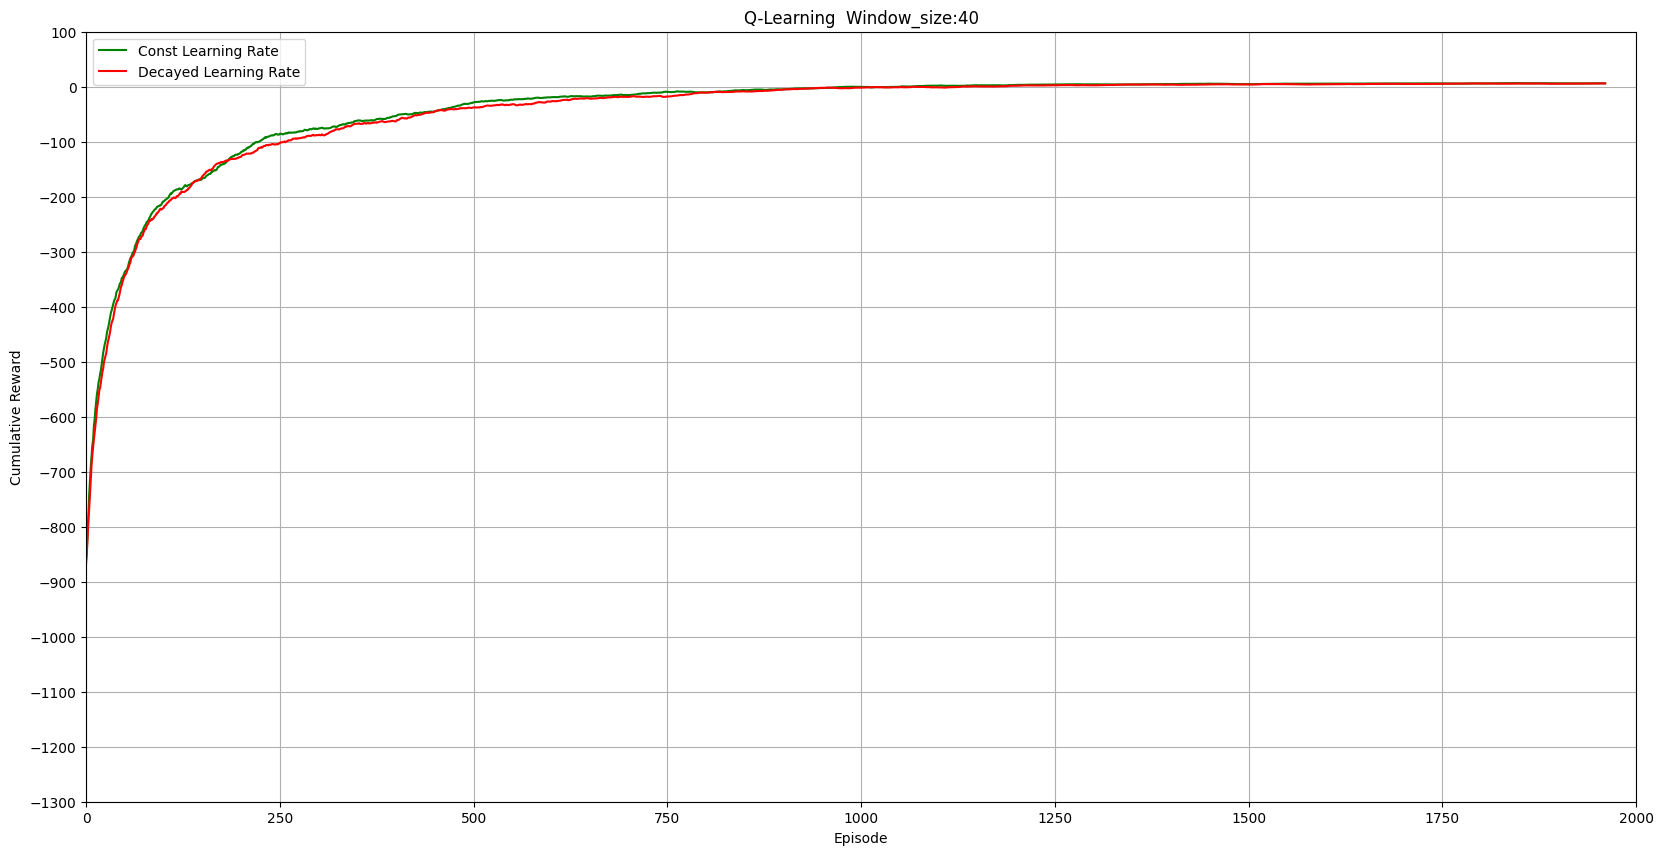

In [25]:
def move_avg(data, win_size):
    return np.convolve(data, np.ones(win_size)/win_size, mode='valid')

plt.figure(figsize=(20,10))
plt.plot(move_avg(reward_episode, 40), color='green', label="Const Learning Rate")
plt.plot(move_avg(reward_episode_rlr, 40), color='red', label="Decayed Learning Rate")
plt.ylim(-1300, 100)
plt.yticks(range(-1300, 101, 100))
plt.xlim(0, 2000)
plt.xticks(range(0, 2001, 250))
plt.grid(True)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Q-Learning  Window_size:40")
plt.legend()
plt.show

#### Const Learning Rate VS Decayed Learning Rate:
As you can see, the rewards for Q-learning with a decaying learning rate and a constant learning rate are slightly different before they converge. However, once they converge, their rewards appear to be the same on, However in most of the times best agent of decaying learning rate has better final reward than best agent of const learning rate also, often mean agent of decaying learning rate has better final reward than mean agent of const learning rate . Q-learning with a decaying learning rate converges faster than Q-learning with a constant learning rate. This is because the learning rate decreases over time, allowing the algorithm to focus on learning the most important Q values first.

<a name='2-4'></a>
### Question 10:

#### Testing our agent after training, for 40 episodes :

In [21]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset(seed=STUDENT_NUM)
Initial_State = env.reset()

reward_list_testing = []
agent = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)   
agent.reset()
for episode in range(EPISODES + 40):
    reward_sum = 0
    Initial_state = env.reset()
    done = False
    state = Initial_State[0]
    action = agent.choose_action(state)
    result = agent.take_action(action)
    next_state = result[0]
    reward = result[1]
    reward_sum += reward
    agent.update_q_table(state, action, next_state, reward)
    while True:
        state = next_state
        action = agent.choose_action(state)
        result = agent.take_action(action)
        next_state = result[0]
        reward = result[1]
        reward_sum += reward
        agent.update_q_table(state, action, next_state, reward)
        done = result[2]
        if done:
            break
    agent.decay_epsilon(episode)
    if (episode > EPISODES):
        reward_list_testing.append(reward_sum)

    
print(reward_list_testing)
print("Mean reward of 40 Episodes :", sum(reward_list_testing)/40)
print("Best reward of 40 Episodes :", max(reward_list_testing))

[10, 4, 3, 8, 7, 12, 7, 8, 7, 8, 6, 7, 2, 8, 7, 7, 10, 6, 8, 8, 6, 12, -4, 4, 4, 4, 5, 8, 4, 6, 6, 6, 8, 1, 5, 9, 7, 5, 1]
Mean reward of 40 Episodes : 6.0
Best reward of 40 Episodes : 12


As you can see, after training our agent, most of our rewards for 40 test episodes are good results (greater than zero), and many of them are optimal rewards.

#### Result for Optimal Policy (After 2000 Episodes) :

we used result of best agent of decaying learning rate.

In [26]:
env = gym.make('Taxi-v3', render_mode="human")
env.reset(seed=STUDENT_NUM)
Initial_State = env.reset()
new_agent = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)   
result = new_agent.take_action(optimal_policy_rlr[Initial_State[0]])
next_state = result[0]
reach_final = False
while(not reach_final):
    result = new_agent.take_action(optimal_policy_rlr[next_state])
    next_state = result[0]
    if (result[2] == True):
        reach_final = True